# <font color='blue'>PDDA machine learning competition 2021 </font> 

### Team: Iron486  

##  <font color='green'> Index:</font> 
- <font color='green'>1. Abstract</font> 
- <font color='green'>2. Introduction</font> 
    - <font color='green'>2.1. Background</font> 
    - <font color='green'>2.2. Problem Statement</font> 
    - <font color='green'>2.3. Data Description</font> 
    - <font color='green'>2.4. Evaluation Metric</font> 
- <font color='green'>3. Import libraries</font> 
- <font color='green'>4. Read data</font> 
- <font color='green'>5. Handling missing values</font> 
- <font color='green'>6. Feature selection</font> 
- <font color='green'>7. Iterative imputer for dropping missing values</font> 
- <font color='green'>8. Removing outliers</font> 
- <font color='green'>9. Correlation</font> 
- <font color='green'>10. Scaling the data</font> 
- <font color='green'>11. Split the dataset</font> 
- <font color='green'>12. Train the model</font> 
    - <font color='green'>12.1 Save the model</font>
    - <font color='green'>12.2 Neural network hyperparameters</font>
- <font color='green'>13. Predict on validation dataset</font> 
- <font color='green'>14. Predict the test dataset</font>
- <font color='green'>15. Conclusions </font>

    

##  <font color='green'>1.  Abstract</font> 

Well-log data play a key role in estimating reservoir properties,
including volumes of minerals, porosity, and water saturation that are critical for
reserve estimation. A conventional workflow using a multimineral physical model
based on core-log integration requires an a priori rock-fluid model;
therefore, it is often inadequate in reservoirs of complex minerals such as carbonate 
or unconventional fields. There is a potential for applying machine learning (ML) 
for data-driven solutions.


A Neural Network is applied to predict shale volume (VSH), a GradientBoostingRegressor to predict water saturation (SW) and ExtraTreesRegressor to predict porosity based on 11 features. The algorithms were tested with a data set from the Equinor Volve Field. A total of 38,823 data points collected from eight wells were used to train and validate the model. The trained model was then applied on the hidden testing data set from four wells in the same field and achieved reasonable accuracy.



## <font color='green'>2. Introduction</font> 

### <font color='green'>2.1. Background</font> 

Well logs are interpreted and processed to estimate in-situ reservoir properties
 (including petrophysical, geomechanical, and geochemical properties), 
 which is essential for reservoir modeling, reserve estimation, and production forecasting.
 The modeling is often based on multimineral physics or empirical formulae. 
 When sufficient training data are available, a machine-learning solution provides 
an alternative approach to estimate those reservoir properties based on well-log data and 
 usually has less turnaround time and human involvement.

### <font color='green'>2.2. Problem Statement</font> 
The objective of this contest is to develop data-driven models to estimate reservoir properties,
including shale volume, porosity, and fluid saturation, based on a common set of well logs,
including gamma ray, bulk density, neutron porosity, resistivity, and sonic.
Log data from eight wells from the same field together with
the corresponding reservoir properties estimated by petrophysicists were provided.
The goal is building a data-driven model using the provided training data set. 
Following that, the newly developed data-driven models will be deployed on the test data set 
to predict the reservoir properties based on the well-log data.


### <font color='green'>2.3. Data Description</font>
#### Files
&gt; #### train.csv -
(All the values equals to -9999 are marked as missing values.)
- WELLNUM - Well number
- DEPTH - Depth, unit in feet
- DTC - Compressional Travel-time, unit in nanosecond per foot
- DTS - Shear Travel-time, unit in microseconds per foot
- BS - Bit size, unit in inch
- CAL - Caliper, unit in Inc
- DEN - Density, unit in Gram per cubic centimeter 
- DENC - Corrected density, unit in Gram per cubic centimeter 
- GR - Gamma Ray, unit in API
- NEU - Neutron, unit in dec
- PEF - Photo-electric Factor, unit in barns/e
- RDEP - Deep Resistivity, unit in Ohm.m
- RMED - Medium Resistivity, unit in Ohm.m
- ROP - Rate of penetration, unit in meters per hour
- PHIF - Porosity, a unit equals to the percentage of pore space in a unit volume of rock.
- SW - Water saturation
- VSH - Shale Volume

&gt; #### test.csv -
The test data has all features used in the train dataset, except PHIF, SW, and VSH.

&gt; ####  Iron486_1.csv -
submission.
<p><font style="">
</font></p>

### <font color='green'>2.4. Evaluation Metric</font>
Submissions are evaluated according to root mean squared error(RMSE)

$$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(\hat{\mathbf{y_{i}}} - \mathbf{y_{i}})^{2}} = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(\hat{y}_{1, i} - y_{1, i})^{2}+(\hat{y}_{2, i} - y_{2, i})^{2}+(\hat{y}_{3, i} - y_{3, i})^{2}}$$

where
- $\hat{y_i}$ is the predicted values of the true values $y_i$. Both $\hat{y_i}$ and $y_i$ are vectors with 3 elements: $y_{1,i}$ - PHIF, $y_{2,i}$ - SW, and $y_{3,i}$ - VSH. 
- $m$ is the sample size.

## <font color='green'>3. Import libraries</font> 

In [1]:
import pandas as pd
from sklearn.linear_model import BayesianRidge
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from numpy import isnan
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import Birch
from numpy import unique
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

## <font color='green'>4. Read data</font>

In [2]:
df1=pd.read_csv('train.csv')


In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df1.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
count,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00,318967.00
mean,4.08,6998.18,-7791.05,-8605.14,-958.27,-6982.04,-7000.76,-7205.37,-43.03,-7007.12,-7221.97,-949.84,-804.02,-989.37,-8515.78,-8515.69,-8585.16
std,2.46,3797.94,4168.06,3491.48,2969.16,4592.48,4582.29,4486.57,990.10,4578.76,4480.14,2944.07,4177.16,3028.43,3554.02,3554.22,3484.04
min,0.00,335.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
25%,2.00,3757.87,-9999.00,-9999.00,8.50,-9999.00,-9999.00,-9999.00,23.33,-9999.00,-9999.00,0.65,0.67,15.20,-9999.00,-9999.00,-9999.00
50%,4.00,6905.18,-9999.00,-9999.00,17.50,-9999.00,-9999.00,-9999.00,55.51,-9999.00,-9999.00,1.10,1.15,24.97,-9999.00,-9999.00,-9999.00
75%,6.00,10052.49,-9999.00,-9999.00,26.00,8.56,2.25,0.03,78.98,0.09,0.06,2.02,2.15,30.63,-9999.00,-9999.00,-9999.00
max,8.00,15651.58,181.81,388.84,36.00,20.33,3.09,0.33,1124.44,1.46,13.84,80266.80,97543.40,208.63,0.40,1.00,3.65


In [4]:
df1.head()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,0,335.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,5.33,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
1,0,335.66,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,5.82,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
2,0,336.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,6.52,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
3,0,336.66,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,7.23,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00
4,0,337.16,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,9.50,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00,-9999.00


## <font color='green'>5. Handling missing values</font> 

"-9999" is shown as the missing value in all features. To handle the missing values,
 all the values equal to "-9999" are replaced to `np.nan`.

In [5]:
df1.replace(['-9999', -9999], np.nan, inplace=True)
df1

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
0,0,335.16,NaN,NaN,NaN,NaN,NaN,NaN,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,335.66,NaN,NaN,NaN,NaN,NaN,NaN,5.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,336.16,NaN,NaN,NaN,NaN,NaN,NaN,6.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,336.66,NaN,NaN,NaN,NaN,NaN,NaN,7.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,337.16,NaN,NaN,NaN,NaN,NaN,NaN,9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318962,8,12142.50,64.58,NaN,8.50,8.55,2.61,0.03,32.92,0.11,5.21,4.08,3.65,10.43,0.03,1.00,0.27
318963,8,12143.00,66.21,NaN,8.50,8.52,2.61,0.02,28.77,0.10,5.23,4.12,3.94,9.47,0.03,1.00,0.23
318964,8,12143.50,67.43,NaN,8.50,8.52,2.62,0.03,25.70,0.10,5.34,4.66,4.25,8.96,0.02,1.00,0.21
318965,8,12144.00,66.56,NaN,8.50,8.52,2.62,0.03,22.94,0.09,5.35,4.81,4.37,8.81,0.02,1.00,0.18


Remove all the rows that contain `nan` by using `dropna()` function to the output features.

In [6]:
col_names =list(df1.columns.values[-3:])
df1.dropna(axis=0, subset=col_names, inplace=True)
df1

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP,PHIF,SW,VSH
27573,0,14121.66,89.65,NaN,NaN,9.90,2.58,NaN,88.86,0.28,NaN,2.63,2.49,NaN,0.00,1.00,0.75
27574,0,14122.16,96.02,NaN,NaN,9.99,2.47,NaN,120.89,0.29,NaN,2.48,2.47,NaN,0.00,1.00,1.03
27575,0,14122.66,104.05,NaN,NaN,9.90,2.33,NaN,153.52,0.45,NaN,2.44,2.37,NaN,0.00,1.00,1.31
27576,0,14123.16,113.50,NaN,NaN,9.90,2.24,NaN,182.85,0.58,NaN,2.41,2.41,NaN,0.00,1.00,1.68
27577,0,14123.66,117.78,NaN,NaN,9.81,2.23,NaN,256.20,0.56,NaN,2.34,2.41,NaN,0.00,1.00,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318962,8,12142.50,64.58,NaN,8.50,8.55,2.61,0.03,32.92,0.11,5.21,4.08,3.65,10.43,0.03,1.00,0.27
318963,8,12143.00,66.21,NaN,8.50,8.52,2.61,0.02,28.77,0.10,5.23,4.12,3.94,9.47,0.03,1.00,0.23
318964,8,12143.50,67.43,NaN,8.50,8.52,2.62,0.03,25.70,0.10,5.34,4.66,4.25,8.96,0.02,1.00,0.21
318965,8,12144.00,66.56,NaN,8.50,8.52,2.62,0.03,22.94,0.09,5.35,4.81,4.37,8.81,0.02,1.00,0.18


In [7]:
df1.isna().sum()

WELLNUM        0
DEPTH          0
DTC        22995
DTS        35111
BS          1880
CALI           0
DEN            0
DENC        1880
GR             0
NEU            3
PEF         1880
RDEP         234
RMED           0
ROP         1977
PHIF           0
SW             0
VSH            0
dtype: int64

## <font color='green'>6. Feature selection</font> 
The following features are selected:
`'DEPTH', 'DTC', 'DTS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF','RDEP', 'RMED'`.

In [8]:
corr_matr=df1[1:].corr()
#corr_matr['PHIF'].sort_values(ascending=False)
corr_matr['SW'].sort_values(ascending=False)

SW         1.00
DEN        0.74
GR         0.39
VSH        0.38
CALI       0.15
PEF        0.15
DENC       0.06
NEU       -0.01
RDEP      -0.08
WELLNUM   -0.11
DTS       -0.12
RMED      -0.17
DEPTH     -0.20
ROP       -0.34
DTC       -0.37
PHIF      -0.72
BS          NaN
Name: SW, dtype: float64

## <font color='green'>7. Iterative imputer for dropping missing values</font>

IterativeImputer function with `BayesianRidge` estimator is used to fill missing values.

In [9]:

col=['DEPTH', 'DTC', 'DTS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF',
        'RDEP', 'RMED','PHIF','SW','VSH']

strategies = ['ascending']#, 'descending', 'roman', 'arabic', 'random']
for s in strategies:
    imputer=IterativeImputer(estimator=BayesianRidge(),imputation_order=s)
df1=df1.loc[:,col]
imputer.fit(df1)
# transform the dataset
df1 = pd.DataFrame(imputer.transform(df1),columns=df1.columns,index=df1.index)

In [10]:
df1.to_csv('dataset_with_iterativeimputer_bay.csv')


In [11]:
df1=pd.read_csv('dataset_with_iterativeimputer_bay.csv') #on 11 features
#df1=df1.reset_index(drop=True)
#df1=df1.reset_index(drop=True)
df1=df1.drop(columns='Unnamed: 0')
df1

,DEPTH,DTC,DTS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,PHIF,SW,VSH
0,14121.66,89.65,187.88,9.90,2.58,0.17,88.86,0.28,6.10,2.63,2.49,0.00,1.00,0.75
1,14122.16,96.02,200.28,9.99,2.47,0.18,120.89,0.29,5.37,2.48,2.47,0.00,1.00,1.03
2,14122.66,104.05,212.67,9.90,2.33,0.17,153.52,0.45,6.00,2.44,2.37,0.00,1.00,1.31
3,14123.16,113.50,230.89,9.90,2.24,0.17,182.85,0.58,7.01,2.41,2.41,0.00,1.00,1.68
4,14123.66,117.78,234.43,9.81,2.23,0.19,256.20,0.56,4.55,2.34,2.41,0.00,1.00,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42304,12142.50,64.58,105.09,8.55,2.61,0.03,32.92,0.11,5.21,4.08,3.65,0.03,1.00,0.27
42305,12143.00,66.21,106.20,8.52,2.61,0.02,28.77,0.10,5.23,4.12,3.94,0.03,1.00,0.23
42306,12143.50,67.43,107.84,8.52,2.62,0.03,25.70,0.10,5.34,4.66,4.25,0.02,1.00,0.21
42307,12144.00,66.56,106.10,8.52,2.62,0.03,22.94,0.09,5.35,4.81,4.37,0.02,1.00,0.18


## <font color='green'>8. Removing outliers</font> 
The outliers are removed using `IsolationForest` and passing from 42309 to 38923 rows.

In [12]:
clf = IsolationForest(random_state=0).fit_predict(df1.iloc[:,:11]) #better
df1_x_train = df1.iloc[:,:11][clf==1]
df1_y_train=df1.iloc[clf==1,[11,12,13]]
df1_y_train

,PHIF,SW,VSH
71,0.00,1.00,0.31
72,0.00,1.00,0.27
78,0.07,0.79,0.14
79,0.14,0.33,0.09
80,0.18,0.25,0.06
...,...,...,...
42304,0.03,1.00,0.27
42305,0.03,1.00,0.23
42306,0.02,1.00,0.21
42307,0.02,1.00,0.18


## <font color='green'>9. Correlation</font> 
Below some graphs are plotted to gain more insights on data.

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GR', ylabel='VSH'>

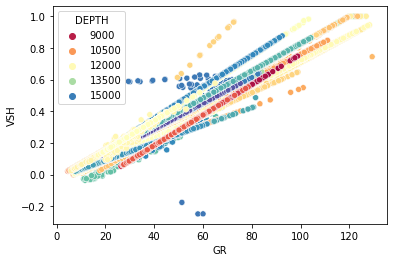

In [13]:
sns.scatterplot(df1_x_train.loc[:,'GR'], df1_y_train.loc[:,'VSH'],hue=df1_x_train.loc[:,'DEPTH'],palette='Spectral')
#plt.xlim((40,60))
#plt.ylim((0.2,0.5))

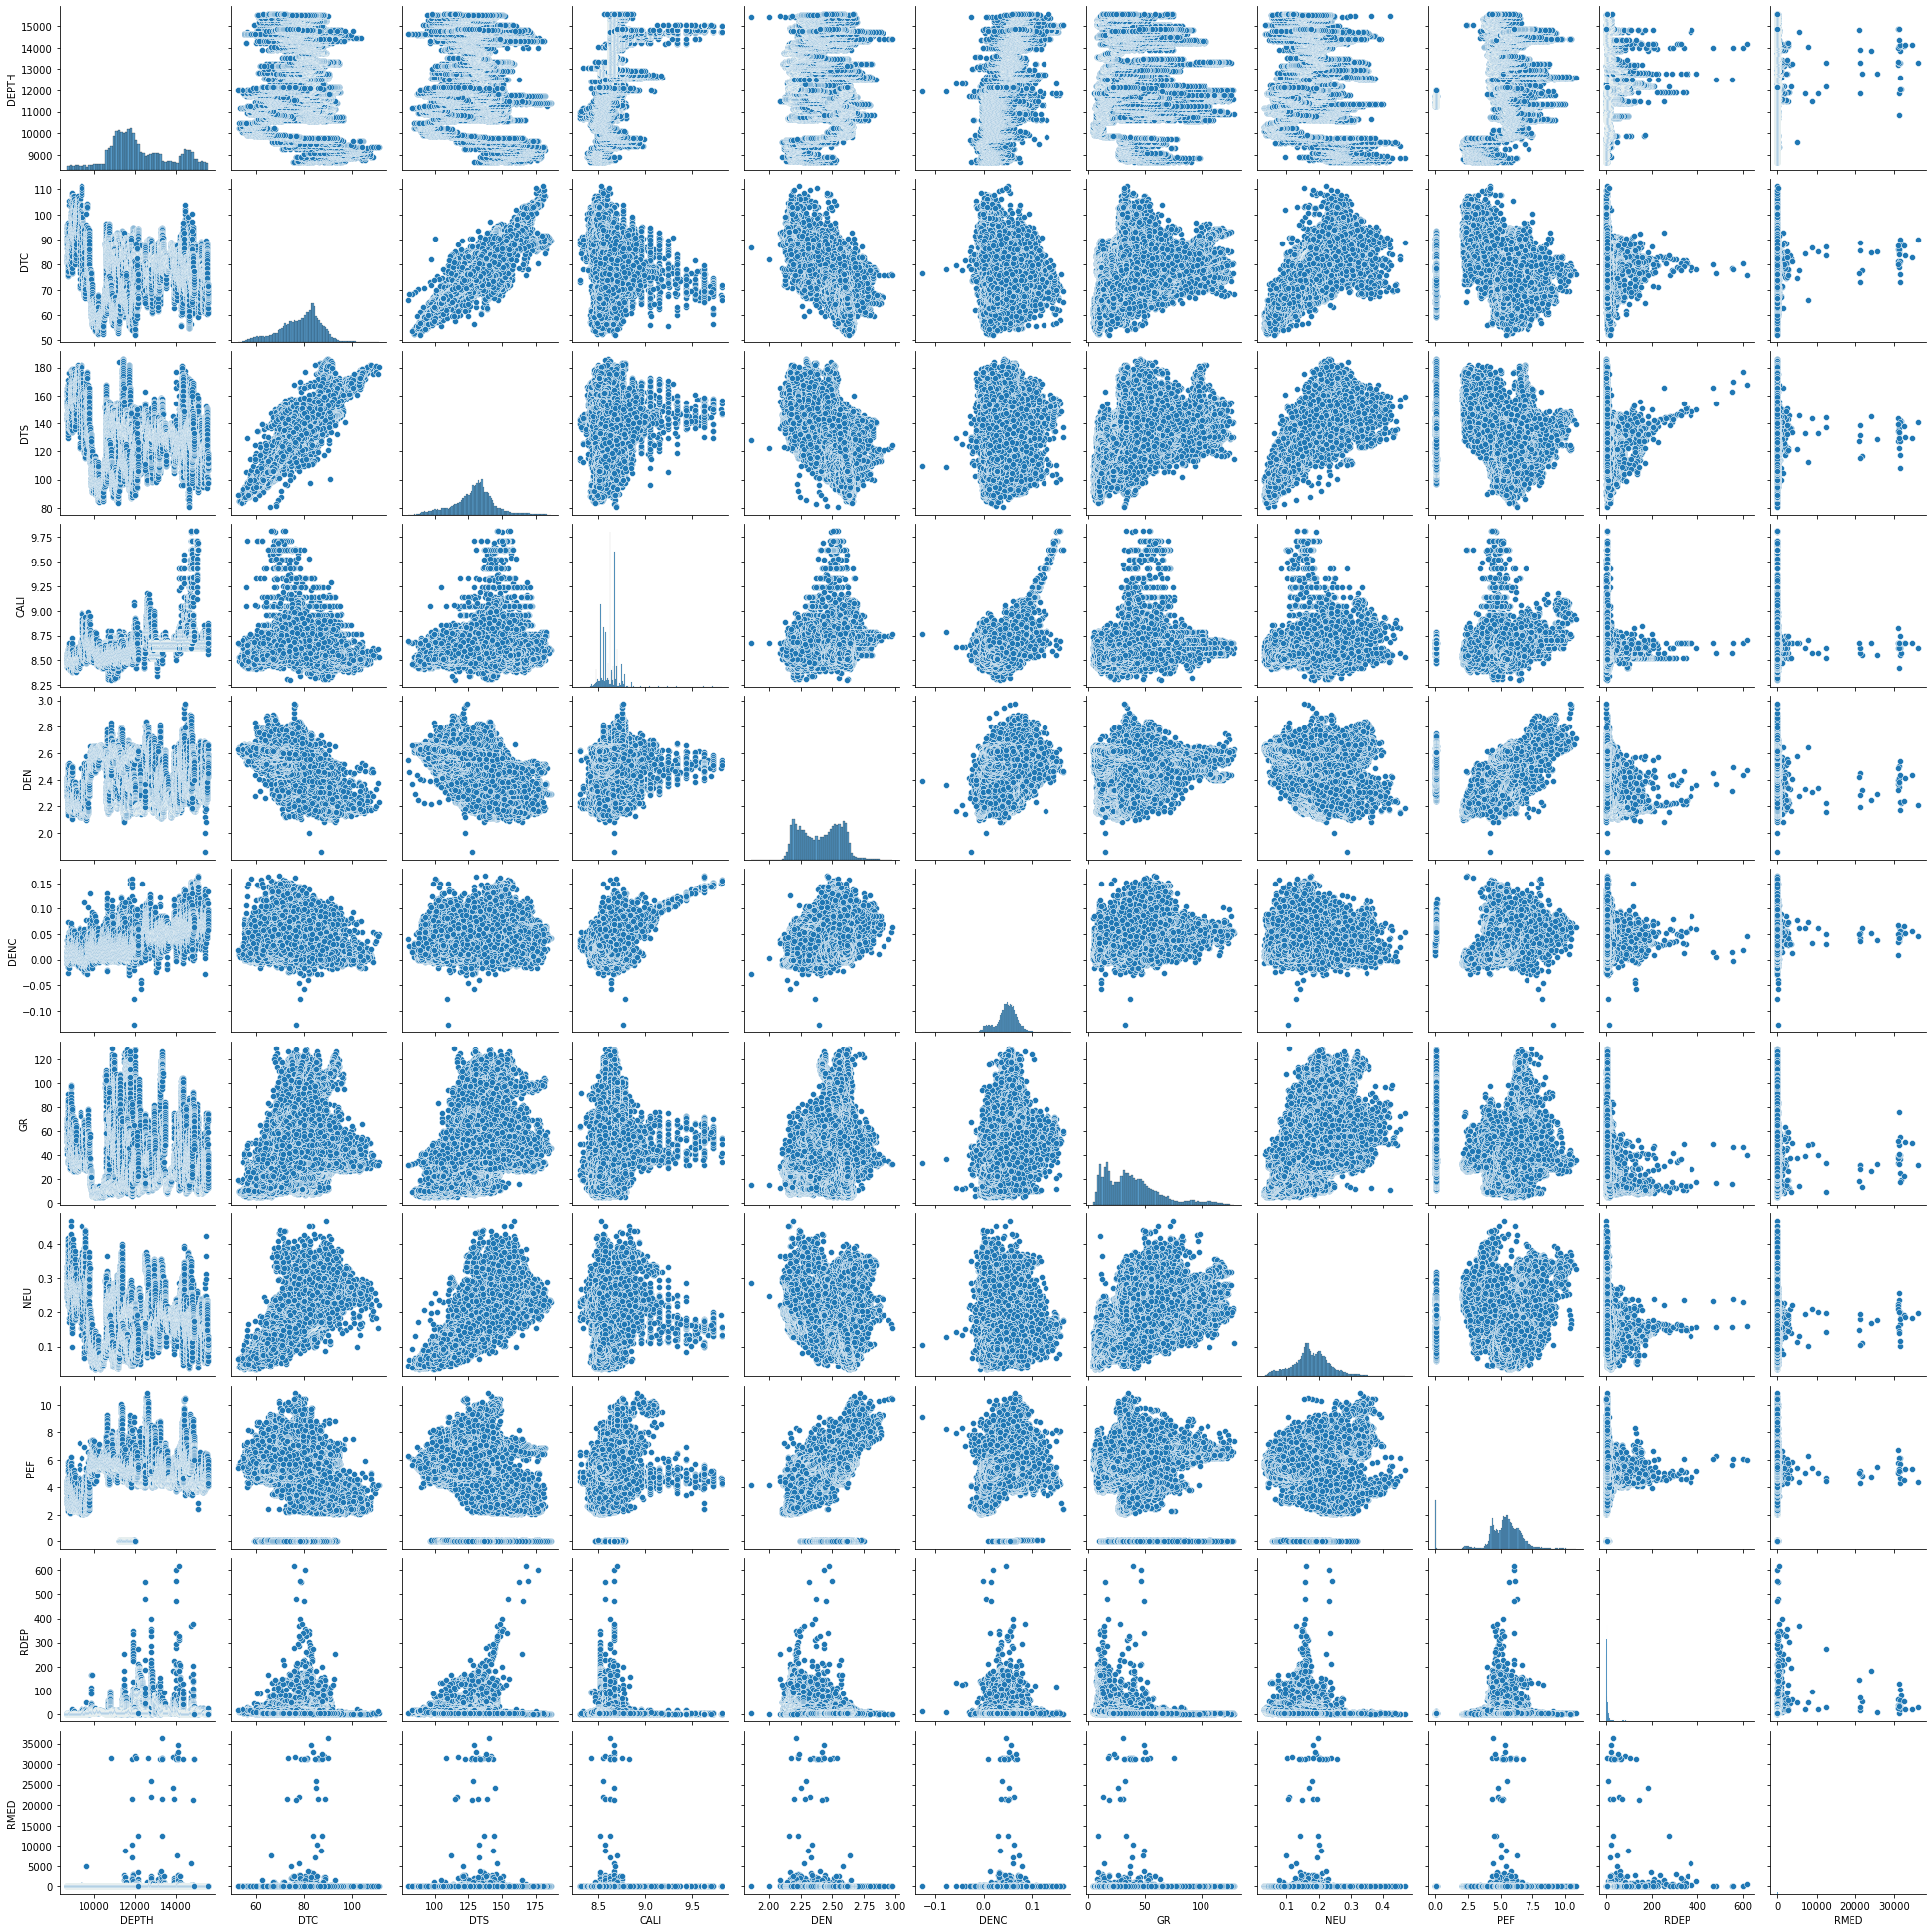

In [14]:
sns.pairplot(df1_x_train,palette='Spectral')

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEPTH', ylabel='VSH'>

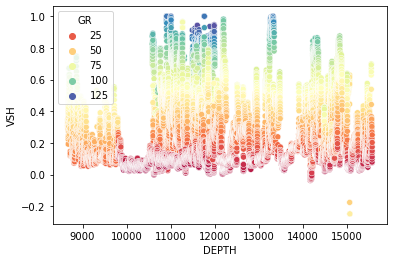

In [15]:
sns.scatterplot(df1_x_train.loc[:,'DEPTH'], df1_y_train.loc[:,'VSH'],hue=df1_x_train.loc[:,'GR'],palette='Spectral')

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 6.0)

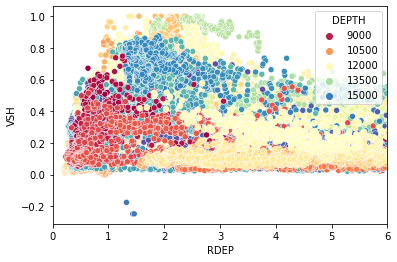

In [16]:
sns.scatterplot(df1_x_train.loc[:,'RDEP'], df1_y_train.loc[:,'VSH'],hue=df1_x_train.loc[:,'DEPTH'],palette='Spectral')
plt.xlim((0,6))
#plt.ylim((0.4,0.5))

## <font color='green'>10. Scaling the data</font>
Data are scaled using `StandardScaler`.

In [17]:
scaler=StandardScaler()
df1_x_train=pd.DataFrame(scaler.fit_transform(df1_x_train),columns=df1_x_train.columns,index=df1_x_train.index)

In [18]:
df1_x_train.describe()

,DEPTH,DTC,DTS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED
count,38923.00,38923.00,38923.00,38923.00,38923.00,38923.00,38923.00,38923.00,38923.00,38923.00,38923.00
mean,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.35,-3.08,-3.27,-2.87,-3.55,-7.90,-1.43,-2.47,-3.19,-0.46,-0.05
25%,-0.68,-0.62,-0.53,-0.63,-0.94,-0.51,-0.83,-0.58,-0.34,-0.41,-0.05
50%,-0.24,0.16,0.11,-0.03,0.07,0.06,-0.16,-0.05,0.15,-0.36,-0.05
75%,0.66,0.68,0.57,0.39,0.87,0.60,0.49,0.59,0.56,-0.14,-0.04
max,2.19,3.84,3.83,10.47,3.67,5.27,3.76,4.97,3.51,21.84,45.41


## <font color='green'>11. Split the dataset</font> 
The data are split into train and validation dataset, using the first 80 percent for the train dataset and the remaining for the validation one.


In [19]:
# Here, we separate train and test data by wells
ns = int(df1_x_train.shape[0]*80/100)
X_train, X_val = df1_x_train[:ns], df1_x_train[ns:]
y_train, y_val = df1_y_train[:ns], df1_y_train[ns:]

# # if you want to separate train and test data randomly
# # please remember to use random_state for all randomization steps, this will ensure we get the same results 
# # as yours during the validation phase. 
# X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=100)

## <font color='green'>12. Train the model</font> 

The following functions, are used to fit the model into the train dataset and to calculate the RMSE and R2 metrics for the train and the validation dataset. Also,predicted and actual values are plotted.

In [20]:
def grid_search(clf, param_grid, X_train=X_train, y_train=y_train,ht='random'):
    """
    Fits a classifier to its training data and prints its ROC AUC score.
    
    INPUT:
    - clf (classifier): classifier to fit
    - param_grid (dict): classifier parameters used with GridSearchCV
    - X_train (DataFrame): training input
    - y_train (DataFrame): training output
            
    OUTPUT:
    - classifier: input classifier fitted to the training data
    """
    # cv uses StratifiedKFold
    # scoring r2 as parameter
    if ht=='random':
        grid = RandomizedSearchCV(estimator=clf, 
                            param_distributions=param_grid, 
                            scoring='r2',n_iter=50,
                            cv=5)
    else:
        grid = GridSearchCV(estimator=clf, 
                            param_grid=param_grid, 
                            scoring='r2', 
                            cv=5)
    grid.fit(X_train, y_train)
    print(grid.best_score_)
    print(grid.best_estimator_)
    return grid.best_estimator_

In [21]:
def result_plot(y_predict, y_real, n_points=1000):
    names = ['PHIF', 'SW', 'VSH']
    RMSE, R2 = [], []
    
    for i,name in enumerate(names):
        RMSE.append(np.sqrt(mean_squared_error(y_real.iloc[:,i], y_predict.iloc[:,i])))
        R2.append(r2_score(y_real.iloc[:,i], y_predict.iloc[:,i]))
    
    # check the accuracy of predicted data and plot the result
    print('RMSE:', '{:.5f}'.format(np.sqrt(mean_squared_error(y_real, y_predict))))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {RMSE[i]:.5f}')
#     print("-"*65)
    
    print( 'R^2: ', r2_score(y_real, y_predict))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {R2[i]:.5f}')
    
    plt.subplots(nrows=3, ncols=2, figsize=(16,16))

    for i,name in enumerate(names):       
        plt.subplot(3, 2, i*2+1)
        plt.plot(y_real.iloc[:n_points, i])
        plt.plot(y_predict.iloc[:n_points, i])
        plt.legend(['True', 'Predicted'])
        plt.xlabel('Sample')
        plt.ylabel(name)
        plt.title(name+' Prediction Comparison')

        plt.subplot(3, 2, i*2+2)
        plt.scatter(y_real.iloc[:, i], y_predict.iloc[:, i], alpha=0.01)
        plt.xlabel('Real Value')
        plt.ylabel('Predicted Value')
        plt.title(name+' Prediction Comparison')
    
    plt.show()




Different algorithms are tested for the 3 petrophysical parameters.
Also, the data were divided into clusters and, for each cluster, different algorithms were applied.
At the end, the best model was the model obtained not dividing into clusters the dataset.

The Neural Network is the best verified model to predict shale volume (VSH),
with the following optimizer hyperparameters:
`{'name': 'Adam',
'learning_rate': 5.5e-06,
'decay': 0.0,
'beta_1': 0.92,
'beta_2': 0.88,
'epsilon': 1e-08,
'amsgrad': 'False'}`    
    
`GradientBoostingRegressor` is used to predict water saturation (SW)
and `ExtraTreesRegressor` to predict porosity (PHIF).

In [22]:
from numpy.random import seed
seed(80)

tf.random.set_seed(79)
reg = GradientBoostingRegressor(random_state=100)
rf=RandomForestRegressor(n_estimators=100, random_state=100)
exreg = ExtraTreesRegressor(n_estimators=100, random_state=100)
adreg= AdaBoostRegressor(n_estimators=100, random_state=100)
lr=LinearRegression()
poly=PolynomialFeatures(degree=2,include_bias=False)
n_clust=1
if n_clust > 1: #to divide in more clusters
    birch = Birch(threshold=0.01, n_clusters=n_clust)
    # fit the model
    birch.fit(X_train)
    # assign a cluster to each example
    yhat = birch.predict(X_train)
    # retrieve unique clusters
    clusters = unique(yhat)
    #for cluster in clusters:
    #    # get row indexes for samples with this cluster
    #    row_ix = where(yhat == cluster)
    names=['PHIF', 'SW']+[range(n_clust)]
    names
    #reg_best = grid_search(reg, {})
    yhat_val = birch.predict(X_val)

    clusts=[]
    clusts_val=[]

    for i in range(n_clust):
        clust=np.where(yhat==i)
        clusts.append(clust) # dataframes nested into a list

        clust_val=np.where(yhat_val==i)
        clusts_val.append(clust_val)
    #reg = GradientBoostingRegressor(n_estimators=100, random_state=100)
    clusters=[]
    cluster_instances=[]
    true=pd.DataFrame([])
    pred=pd.DataFrame([])

    clusters_val=[]
    cluster_instances_val=[]
    true_val=pd.DataFrame([])
    pred_val=pd.DataFrame([])

    for c,cval,i in zip(clusts,clusts_val,range(n_clust)): #try different algorithms for different clusters
        ind=c[0]
        target='SW'
        cluster_instance=y_train[target].iloc[ind]
        cluster_instances.append(cluster_instance)
        if i==0:
            reg_best_target = grid_search(exreg, {},X_train.iloc[ind],y_train[target].iloc[ind])
        else:  
            reg_best_target = grid_search(exreg, {},X_train.iloc[ind],y_train[target].iloc[ind])
        clust_results=reg_best_target.predict(X_train.iloc[ind])
        clusters.append(clust_results.tolist())
        pred=pd.concat([pred,pd.Series(clust_results)],axis=0)
        true=pd.concat([true,y_train[target].iloc[ind]],axis=0)
        ind_val=cval[0]
        if ind_val.size:
            cluster_instance_val=y_val[target].iloc[ind_val]
            cluster_instances_val.append(cluster_instance_val)
            clust_results_val=reg_best_target.predict(X_val.iloc[ind_val])
            clusters_val.append(clust_results_val.tolist())
            pred_val=pd.concat([pred_val,pd.Series(clust_results_val)],axis=0)
            true_val=pd.concat([true_val,y_val[target].iloc[ind_val]],axis=0)      
else:
    #neural network
    opt = keras.optimizers.Adam(learning_rate=0.0000055, beta_1=0.92,beta_2=0.88,epsilon=1e-08,amsgrad='False')
    model=keras.models.Sequential([keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.05),
                                   keras.layers.Dense(6820,activation='elu'
                                                      ,kernel_initializer='glorot_normal'
                                                     #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                     ),
                                   keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.07),
                                   keras.layers.Dense(1200,activation='elu',
                                                      kernel_initializer='glorot_normal',
                                                   #  ,kernel_regularizer=keras.regularizers.l2(0.02)
                                                    ),
                                   keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.05),
                                   keras.layers.Dense(44,activation='elu'
                                                      ,kernel_initializer='glorot_normal'
                                                     #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                     ),
                                   #keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.21),
                                   keras.layers.Dense(1,activation='sigmoid')])
    #model.summary()
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    import os
    root_logdir=os.path.join(os.curdir,'my_logs')
    def get_run_logdir():
        import time
        run_id=time.strftime('run_%Y_%m_%d-%H_%M_%S')
        return os.path.join(root_logdir,run_id)
    run_logdir=get_run_logdir()
    tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
    #checkpoint_cb=keras.callbacks.ModelCheckpoint('my_keras_model',save_best_only=True)
    early_stopping_cb=keras.callbacks.EarlyStopping(patience=18,restore_best_weights=True)
    
    history=model.fit(np.array(X_train),np.array(y_train['VSH']),
    epochs=2000,validation_data=(X_val,y_val['VSH']),
                     callbacks=[early_stopping_cb])


Epoch 1/2000
974/974 [==============================] - 29s 26ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 2/2000
974/974 [==============================] - 25s 26ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 3/2000
974/974 [==============================] - 25s 26ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 4/2000
974/974 [==============================] - 25s 26ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5/2000
974/974 [==============================] - 25s 26ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 6/2000
974/974 [==============================] - 25s 25ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoc

In [23]:
#GradientBoostingRegressor
param_grid={"max_depth" : [280],
            #"min_samples_leaf":[4],
            #'learning_rate': [0.12],
            "min_samples_leaf":[5],
            #'tol': [0.0001],
            #'min_impurity_decrease':[0.3],
            #"min_weight_fraction_leaf":[0.0],
            "max_features":['auto'],
            "max_leaf_nodes":[8] ,
            'n_iter_no_change':[3],
            #'min_impurity_decrease':[0.3],
            #'warm_start':['True'],
            #'criterion':['squared_error'],
               'n_estimators': [80]}  


reg_best_SW = grid_search(reg,param_grid,X_train, y_train.loc[:,'SW'],ht='nonrandom')
a=reg_best_SW.predict(X_val)
mean_squared_error(y_val.loc[:,'SW'], a)

0.9451404033111104
GradientBoostingRegressor(max_depth=280, max_features='auto', max_leaf_nodes=8,
                          min_samples_leaf=5, n_estimators=80,
                          n_iter_no_change=3, random_state=100)


0.008268443164783831

In [24]:
#ExtraTreesRegressor
#max_depth=10, min_samples_leaf=2, n_estimators=80
param_grid={#"max_depth" : [100],
              'bootstrap': [False],
            "min_samples_leaf":[6],
           "min_weight_fraction_leaf":[0.0],
            "max_features":["auto"],
            "max_leaf_nodes":[6000] ,
               'n_estimators': [80]
          #'bootstrap': [True, False]
           }   
reg_best_PHIF = grid_search(exreg,param_grid,X_train, y_train.loc[:,'PHIF'],ht='nonrandom')
a=reg_best_PHIF.predict(X_val)
mean_squared_error(y_val.loc[:,'PHIF'], a)

0.9693691150178397
ExtraTreesRegressor(max_leaf_nodes=6000, min_samples_leaf=6, n_estimators=80,
                    random_state=100)


0.00025244227750706883

In [25]:
reg_best_PHIF.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 6000,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

### <font color='green'>12.1 Save the model</font>

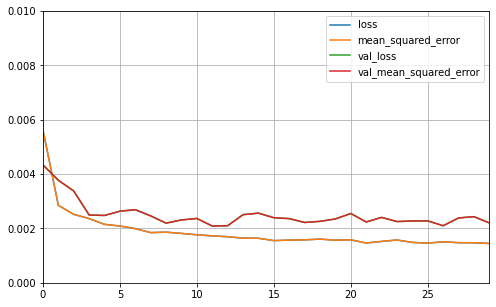

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_xlim(0,29)
plt.gca().set_ylim(0,0.01)
model.save('my_keras_model_iterativeimp_1111.h5')

### <font color='green'>12.2 Neural network hyperparameters</font>

In [27]:
model=keras.models.load_model('my_keras_model_iterativeimp_1111.h5') 
model.summary()

#to visualize activation functions
for i, layer in enumerate (model.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')
#specific info about each layer
for i in range(len(model.layers)):
    print(f'{i}   {model.layers[i]}: \n{model.layers[i].get_config()} \n')
#info about optimizers
model.optimizer.get_config()        

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 11)                44        
_________________________________________________________________
dense (Dense)                (None, 6820)              81840     
_________________________________________________________________
batch_normalization_1 (Batch (None, 6820)              27280     
_________________________________________________________________
dense_1 (Dense)              (None, 1200)              8185200   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1200)              4800      
_________________________________________________________________
dense_2 (Dense)              (None, 44)                52844     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4

{'name': 'Adam',
 'learning_rate': 5.5e-06,
 'decay': 0.0,
 'beta_1': 0.92,
 'beta_2': 0.88,
 'epsilon': 1e-08,
 'amsgrad': 'False'}

## <font color='green'>13. Predict on validation dataset</font> 

The models are applied to predict PHIF,SW and VSH on validation dataset.

RMSE: 0.02970
    PHIF  : 0.00501
    SW    : 0.04163
    VSH   : 0.02981
R^2:  0.9868860220510062
    PHIF  : 0.99560
    SW    : 0.98681
    VSH   : 0.97825


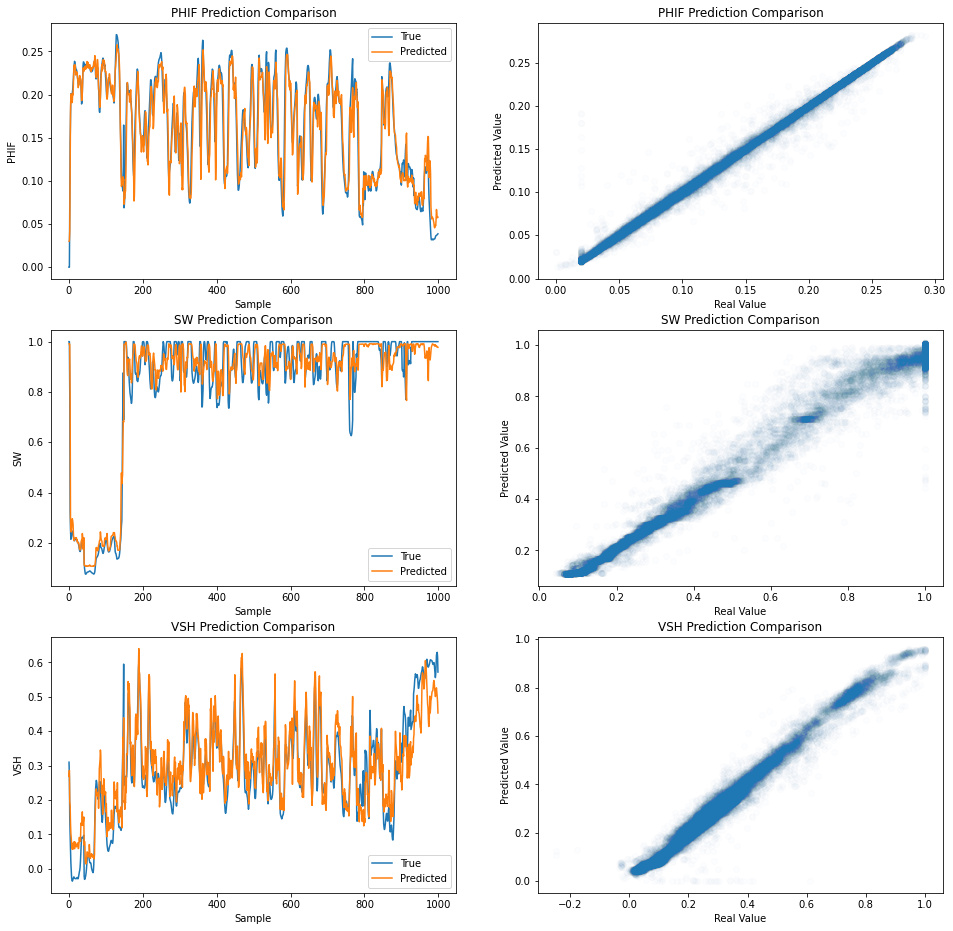

RMSE: 0.05947
    PHIF  : 0.01589
    SW    : 0.09093
    VSH   : 0.04569
R^2:  0.8354605617388643
    PHIF  : 0.96641
    SW    : 0.63665
    VSH   : 0.90332


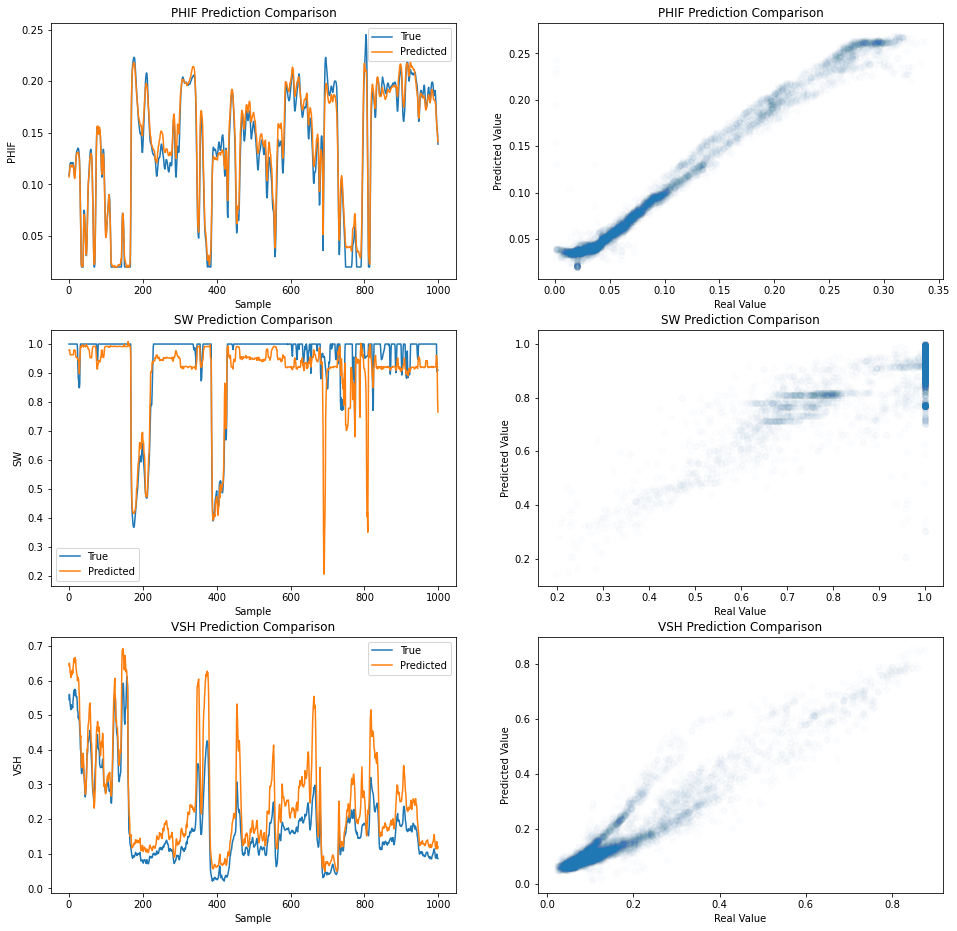

true:         0    1    2
0     0.00 1.00 0.31
1     0.00 1.00 0.27
2     0.07 0.79 0.14
3     0.14 0.33 0.09
4     0.18 0.25 0.06
...    ...  ...  ...
31133 0.08 1.00 0.55
31134 0.09 1.00 0.56
31135 0.10 1.00 0.55
31136 0.10 1.00 0.54
31137 0.11 1.00 0.54

[31138 rows x 3 columns]
pred:         0    1             2
0     0.03 0.99  [0.26895076]
1     0.03 0.99  [0.28618595]
2     0.04 0.99  [0.19530211]
3     0.12 0.76   [0.1839553]
4     0.18 0.30  [0.13300315]
...    ...  ...           ...
31133 0.08 0.99   [0.6500486]
31134 0.09 0.99   [0.6528844]
31135 0.10 0.98    [0.642395]
31136 0.10 0.98  [0.64797336]
31137 0.10 0.98   [0.6455587]

[31138 rows x 3 columns]
true:        0    1    2
0    0.11 1.00 0.55
1    0.11 1.00 0.56
2    0.12 1.00 0.55
3    0.12 1.00 0.53
4    0.12 1.00 0.53
...   ...  ...  ...
7780 0.03 1.00 0.27
7781 0.03 1.00 0.23
7782 0.02 1.00 0.21
7783 0.02 1.00 0.18
7784 0.03 1.00 0.17

[7785 rows x 3 columns]
pred:        0    1             2
0    0.11 0.98   [0.64

In [28]:
if n_clust >1:
    y_predict=pd.DataFrame([reg_best_PHIF.predict(X_train),pred.values.flatten(),
                            model.predict(X_train)]).T#clusters
                  #reg_best_VSH.predict(X_train)
    y_true=pd.DataFrame([y_train['PHIF'].values.tolist(),true.values.flatten(),y_train['VSH'].values.tolist()]).T#+ cluster_instances
    
    y_predict_val=pd.DataFrame([reg_best_PHIF.predict(X_val),pred_val.values.flatten()
                               ,model.predict(X_val)]).T#clusters
              #reg_best_VSH.predict(X_train)
    y_true_val=pd.DataFrame([y_val['PHIF'].values.tolist(),true_val.values.flatten(),y_val['VSH'].values.tolist()]).T
else:
    y_predict=pd.DataFrame([reg_best_PHIF.predict(X_train),
                            reg_best_SW.predict(X_train),model.predict(X_train)]).T#clusters
                  #reg_best_VSH.predict(X_train)
    y_true=pd.DataFrame([y_train['PHIF'].values.tolist(),y_train['SW'].values.tolist(),y_train['VSH'].values.tolist()]).T#+ cluster_instances
    
    y_predict_val=pd.DataFrame([reg_best_PHIF.predict(X_val),
                        reg_best_SW.predict(X_val),model.predict(X_val)]).T#clusters
              #reg_best_VSH.predict(X_train)
    y_true_val=pd.DataFrame([y_val['PHIF'].values.tolist(),y_val['SW'].values.tolist(),y_val['VSH'].values.tolist()]).T
    
    
result_plot(y_predict, y_true)#,names=['PHIF', 'SW',list(range(n_clust))])
result_plot(y_predict_val, y_true_val)

print(f'true:{y_true}')
print(f'pred:{y_predict}')

print(f'true:{y_true_val}')
print(f'pred:{y_predict_val}')

## <font color='green'>14. Predict the test dataset</font>

The models are then applied to the test dataset after filling the missing values 
and standardizing the data.

In [29]:
# load test data
df2 = pd.read_csv('test.csv')

# Replace missing value -9999 with np.nan
df2.replace(['-9999', -9999], np.nan, inplace=True)

df2.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP
count,11275.00,11275.00,10614.00,3911.00,11275.00,11275.00,11193.00,11193.00,11275.00,11271.00,11193.00,11198.00,11198.00,6394.00
mean,102.01,12643.58,81.92,146.65,8.53,8.53,2.41,0.03,65.90,0.21,4.14,32.27,35.85,44.89
std,1.64,2516.27,11.36,15.44,0.31,0.19,0.15,0.03,56.26,0.08,1.43,265.81,301.75,56.58
min,100.00,10177.50,48.28,98.21,8.50,8.25,1.33,-0.10,3.99,0.04,1.55,0.10,0.10,3.02
25%,100.00,10869.50,74.20,138.00,8.50,8.36,2.27,0.00,30.11,0.16,3.08,1.74,1.70,24.82
50%,101.00,11343.00,82.69,145.53,8.50,8.51,2.45,0.02,53.77,0.20,3.90,2.86,2.76,25.05
75%,104.00,16034.25,88.91,158.38,8.50,8.65,2.54,0.04,94.25,0.24,5.02,8.18,7.88,44.09
max,104.00,17443.50,125.39,190.26,12.25,9.31,3.20,0.19,1711.42,0.73,15.14,5000.00,5000.00,300.11


In [30]:
test_data = np.array(df2.loc[:,['DEPTH', 'DTC', 'DTS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF',
        'RDEP', 'RMED']])

# Imputation transformer for completing missing values.
imp_mean = IterativeImputer(estimator=BayesianRidge()) #ExtraTreesRegressor(n_estimators=25, random_state=100))
test_data = imp_mean.fit_transform(test_data)

# standardize testing data
X_test = scaler.transform(test_data)

In [31]:
test_predict = np.array([reg_best_PHIF.predict(X_test), #reg_best_SW
                        reg_best_SW.predict(X_test),model.predict(X_test).flatten()]).T
test_predict

array([[0.07169161, 0.94562006, 0.09928492],
       [0.08539546, 0.93113009, 0.09535896],
       [0.09336513, 0.85432799, 0.08063455],
       ...,
       [0.14644855, 0.88999068, 0.23114344],
       [0.15119283, 0.88514891, 0.20295839],
       [0.16072955, 0.87274926, 0.19769105]])

Iron486_1.csv file is generated.

In [32]:
# Replace team_name and num_submit
team_name = 'Iron486'
num_submit = 1

# Please don't change codes below
N_SAMPLES = 11275
n_sub_dict = {1:1, 2:2, 3:3}

# Check submission number is correct
try:
    n_sub = n_sub_dict[num_submit]
except KeyError:
    print(f"ERROR!!! Submission Number must be in 1, 2 or 3")

# Check number of samples are correct
if test_predict.shape[0] != N_SAMPLES:
    raise ValueError(f"Number of samples {test_predict.shape[0]} doesn't matches with the correct value {N_SAMPLES}")

# Write results to csv file
output_result = pd.DataFrame({col_names[-3]:test_predict[:,0], col_names[-2]:test_predict[:,1], col_names[-1]:test_predict[:,2]})
output_result.to_csv(path_or_buf=f'./{team_name}_{n_sub}.csv', index=False)

## <font color='green'>15. Conclusions </font>

The best models, the Neural Network to predict shale volume (VSH),  
`GradientBoostingRegressor` to predict water saturation (SW) and
`ExtraTreesRegressor` to predict porosity (PHIF), gave the following R2 and RMSE scores:

    
    
### Train dataset:

    RMSE: 0.02970
        PHIF  : 0.00501
        SW    : 0.04163
        VSH   : 0.02981
    
    R^2:  0.98689
        PHIF  : 0.99560
        SW    : 0.98681
        VSH   : 0.97825    
    
    
    
### Validation dataset:

    RMSE: 0.05947
        PHIF  : 0.01589
        SW    : 0.09093
        VSH   : 0.04569
    R^2:  0.83546
        PHIF  : 0.96641
        SW    : 0.63665
        VSH   : 0.90332